In [2]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [3]:
# cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Peak_sigmoid/cdf_files/CBC_z_0_4.cdf"
cdf_file = "../data/RUNS/peak_run_no_delta_middle_z_until_0dot08.cdf"
# "./RUNS/CBC_O3_Peak.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [4]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "log_high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "high_mu": dist.Uniform(15, 60),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,0.8),
}

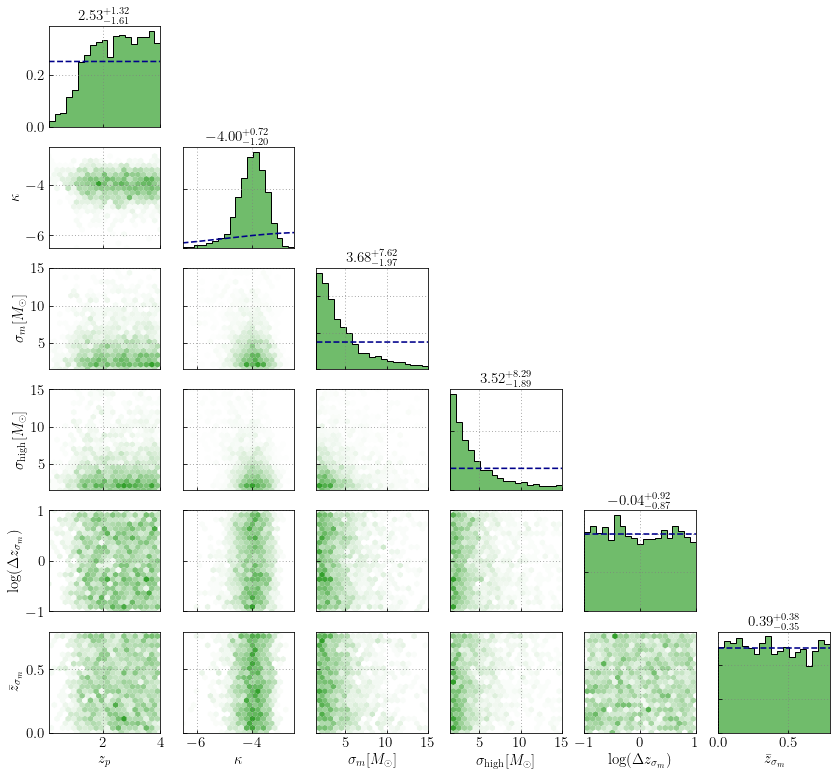

In [5]:
# cm = 1/2.54
fig = plt.figure(figsize=(14,13)) # figsize=(9*cm, 6.75*cm))
# ax.set_rasterization_zorder(2)
toPlot_no_GWB_sig = {
    "zp":{"data":samps.zp,"plot_bounds":(0.1,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa$"},
    "sig_m1":{"data":samps.sig_m1,"plot_bounds":(1.5,15),"label":r"$\sigma_{m} [M_\odot]$"},
    "high_sig":{"data":samps.high_sig,"plot_bounds":(1.5,15),"label":r"$\sigma_{\rm high} [M_\odot]$"},
    "width_sig":{"data":samps.log_width_sig,"plot_bounds":(-1,1),"label":r"log($\Delta z_{\sigma_{m}}$)"},
    "middle_z_sig":{"data":samps.middle_z_sig,"plot_bounds":(0,0.8),"label":r"$\bar z_{\sigma_{m}}$"},
}
plot_corner(fig, toPlot_no_GWB_sig, "#33a02c", labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_sigma_peak.pdf", dpi=600, bbox_inches='tight')
plt.show()

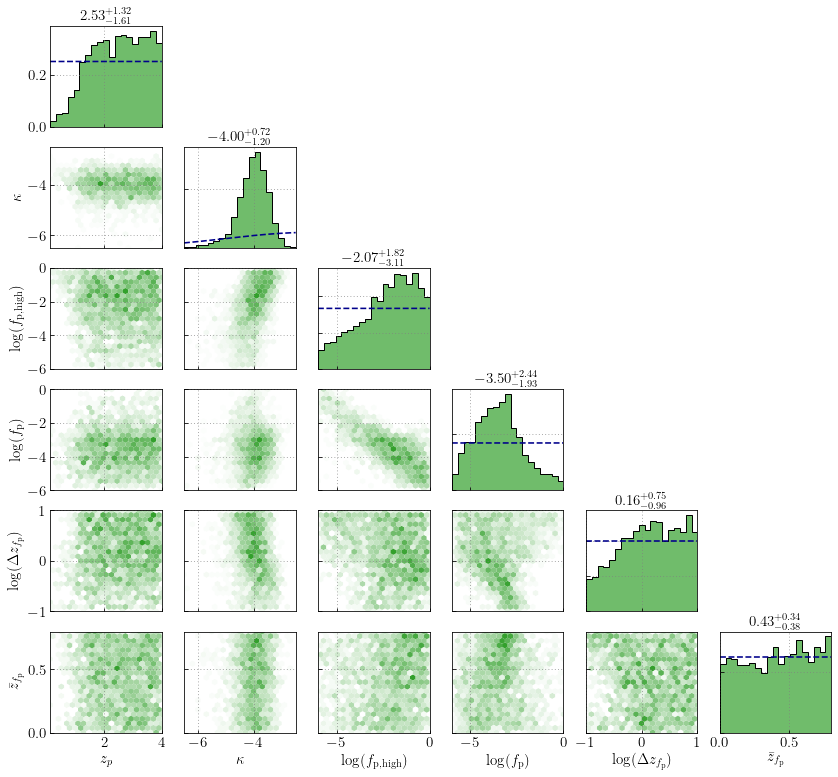

In [7]:
fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_sig = {
    "zp":{"data":samps.zp,"plot_bounds":(0.1,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa$"},
    "log_high_f_peak":{"data":samps.log_high_f_peak,"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p, high})$"},
    "fpeak":{"data":samps.log_f_peak,"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":samps.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{f_{\rm p}})$"},
    "middle_z_f_peak":{"data":samps.middle_z_f_peak,"plot_bounds":(0,0.8),"label":r"$\bar{z}_{f_{\rm p}}$"},
}

plot_corner(fig, toPlot_no_GWB_sig, "#33a02c", labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_fpeak_peak.pdf", dpi=400, bbox_inches='tight')
plt.show()

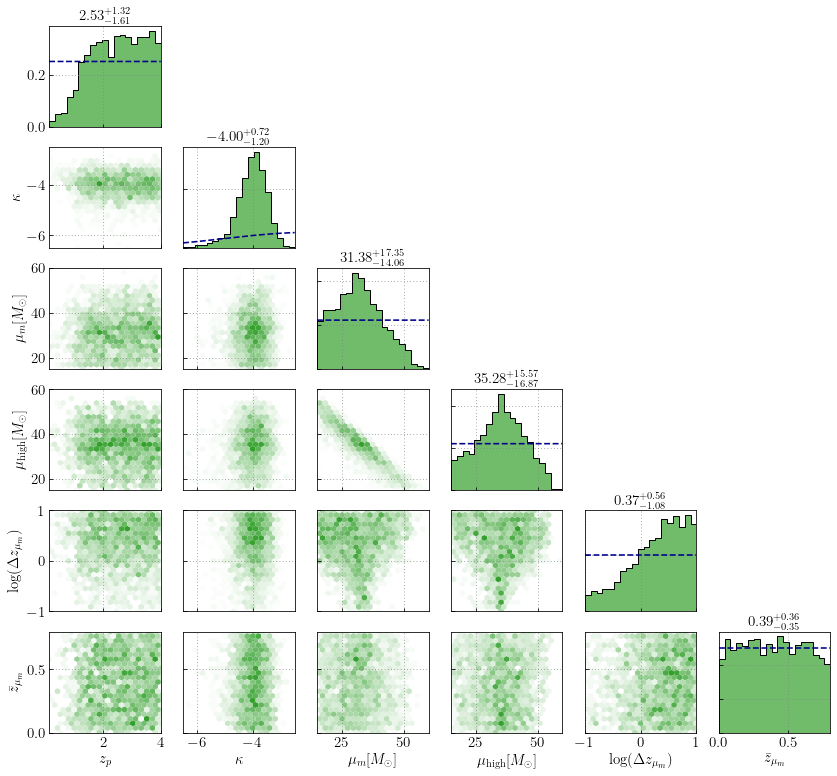

In [6]:
# cm = 1/2.54
fig = plt.figure(figsize=(14,13)) # figsize=(9*cm, 6.75*cm))
# ax.set_rasterization_zorder(2)
toPlot_no_GWB_mu = {
    "zp":{"data":samps.zp,"plot_bounds":(0.1,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa$"},
    "mu_m1":{"data":samps.mu_m1,"plot_bounds":(15, 60),"label":r"$\mu_{m} [M_\odot]$"},
    "high_mu":{"data":samps.high_mu,"plot_bounds":(15, 60),"label":r"$\mu_{\rm high} [M_\odot]$"},
    "width_mu":{"data":samps.log_width_mu,"plot_bounds":(-1,1),"label":r"log($\Delta z_{\mu_{m}}$)"},
    "middle_z_mu":{"data":samps.middle_z_mu,"plot_bounds":(0,0.8),"label":r"$\bar z_{\mu_{m}}$"},
}
plot_corner(fig, toPlot_no_GWB_mu, "#33a02c", labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_mu_peak.pdf", dpi=600, bbox_inches='tight')
plt.show()